
# Project: TMDb Movie Case Study

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
 
>**1**: This dataset contains information about 10,866 movies collected from The Movie Database (TMDb) which is (cleaned from original data on Kaggle), Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters. Read through the description available on the homepage-links present [here](https://www.kaggle.com/tmdb/tmdb-movie-metadata.)
to understand more about the dataset

### Question(s) for Analysis

>**1**: Which director has directed the most popular movies in the year 1996, 2000, and 2015.

>**2**: What is the movie title that generated the highest revenue and it's release date in year 1996, 2000, and 2015.

>**3**: Has movie gain popularity Over the years. 

In [1]:
#Import the required libaries for the analysis
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# The current version of seaborn generate a bunch of warning that we are going to ignore
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the data using pandas and storing it in a variable called df
df = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# We have 10866 rows and 21 columns 
df.shape

(10866, 21)

In [4]:
# To check for the Null values in my dataframe of my data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

<a id='wrangling'></a>
## Data Wrangling 

- Selecting the columns i need to answer my business questions and store them in a variable called df_select.


- From look of the dataframe i dropped the rows with NaN (Not a Number) values in production_companies because I noticed that any movie without a company doesn't have a director, So it make my analysis concise so i have to drop it.


- From the dataframe i noticed that the production_companies has 1030 missing values and directors has 44 missing value and then keywords has 1493 NAN values, which will lend me to droping the rows where production_companies, director has missing values then i will drop columns for keywords which is not needed to answer my business questions.


- Filling the column in genres with "No genres" because from the dataset rows with NaN are mostly TV Shows, News

In [5]:
# Selecting the columns i need to answer my business questions and store them in a variable called df_select
df_select = df.drop(df.columns.difference(['id','release_date','release_year','budget_adj', 'revenue_adj', 'budget','director', 'production_companies','original_title','revenue', 'runtime', 'popularity','vote_count','vote_average','keywords','genres']), 1)
df_select.head()

,id,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
# Viewing the selected column to investigate a missing values 
df_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   director              10822 non-null  object 
 6   keywords              9373 non-null   object 
 7   runtime               10866 non-null  int64  
 8   genres                10843 non-null  object 
 9   production_companies  9836 non-null   object 
 10  release_date          10866 non-null  object 
 11  vote_count            10866 non-null  int64  
 12  vote_average          10866 non-null  float64
 13  release_year          10866 non-null  int64  
 14  budget_adj            10866 non-null  float64
 15  revenue_adj        

In [7]:
# Am working with 16 columns out of the 21 
df_select.shape

(10866, 16)

In [8]:
# From the below structure of the dataframe I dropped the rows with NaN (Not a Number) values
# in production_companies because I noticed that any movie without a company, doesn't have a director,
# So to make my analysis concise and meanfull i have to drop it. 
df_select.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


### Data Cleaning
- To get the rows where director are NaN(Not a Number) and investigate the dataset and i found out that the rows that contain null values has their genres as Documentaries, comedy, e.t.c. and now finally Filled  the columns where direction is NaN with **"director Unknown"** so that it will not affect our analysis 


- To get the rows where production_companies are NaN(Not a Number) and investigate the dataset then Dropped the row where production_companies is NAN (Not a Number) from the dataframe


- Dropped the column with the Dataframe name keyword from the dataframe


- To get the rows where genres are NaN(Not a Number) and investigate the dataset then filling the column in genres with **"No genres"** because from the dataset rows with NaN are mostly TV Shows 


In [9]:
# To get the rows where director are NaN(Not a Number) and investigate the dataset
df_select.query("director != director").head()

,id,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
532,320996,0.126594,0,0,Iliza Shlesinger: Freezing Hot,NaN,stand-up|stand up comedy|aftercreditsstinger|d...,71,Comedy,New Wave Entertainment,1/23/15,14,6.6,2015,0.0,0.0
548,355131,0.108072,0,0,Sense8: Creating the World,NaN,sexuality|superhuman|superpower|making of|soci...,25,Documentary|Science Fiction,Netflix,8/10/15,12,7.5,2015,0.0,0.0
556,321160,0.100910,0,0,With This Ring,NaN,wedding,105,Comedy|Romance,Lifetime Television|Sony Pictures Television,1/24/15,14,6.5,2015,0.0,0.0
1032,259910,0.291253,0,0,Marvel Studios: Assembling a Universe,NaN,superhero|marvel cinematic universe,43,TV Movie|Documentary,Marvel Studios|ABC Studios,3/18/14,32,6.3,2014,0.0,0.0
1054,253675,0.269468,0,0,Unlocking Sherlock,NaN,NaN,60,TV Movie|Documentary,NaN,1/19/14,11,7.2,2014,0.0,0.0


In [10]:
# To get the rows where production_companies are NaN(Not a Number) and investigate the dataset
df_select.query("production_companies != production_companies").head()

,id,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
228,300792,0.584363,0,0,Racing Extinction,Louie Psihoyos,animal species|earth|scientist|globe|activist,90,Adventure|Documentary,NaN,1/24/15,36,7.8,2015,0.0,0.0
259,360603,0.476341,0,0,Crown for Christmas,Alex Zamm,NaN,84,TV Movie,NaN,11/27/15,10,7.6,2015,0.0,0.0
295,363483,0.417191,0,0,12 Gifts of Christmas,Peter Sullivan,christmas,84,Family|TV Movie,NaN,11/26/15,12,6.3,2015,0.0,0.0
298,354220,0.370258,0,0,The Girl in the Photographs,Nick Simon,serial killer|tied feet|tied up while barefoot,95,Crime|Horror|Thriller,NaN,9/14/15,10,4.7,2015,0.0,0.0
328,308457,0.367617,0,0,Advantageous,Jennifer Phang,identity|unemployment|dystopic future|woman di...,92,Science Fiction|Drama|Family,NaN,6/23/15,29,6.4,2015,0.0,0.0


In [11]:
# droping the column with the name keyword from the dataframe
df_drop = df_select.drop(['keywords'], axis = 1)
df_drop

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,0.080598,0,0,The Endless Summer,Bruce Brown,95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,0.065543,0,0,Grand Prix,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,0.065141,0,0,Beregis Avtomobilya,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


In [12]:
# Droping the row where production_companies is NAN (Not a Number) from the dataframe  
df_drop.drop(df_drop.query("production_companies != production_companies").index, axis = 0, inplace = True)

In [13]:
# To confirm that those rows were dropped
df_drop.query("production_companies != production_companies").head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [14]:
# To check and confirm that i actually dropped the row where production_companies is NaN
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9836 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9836 non-null   int64  
 1   popularity            9836 non-null   float64
 2   budget                9836 non-null   int64  
 3   revenue               9836 non-null   int64  
 4   original_title        9836 non-null   object 
 5   director              9815 non-null   object 
 6   runtime               9836 non-null   int64  
 7   genres                9827 non-null   object 
 8   production_companies  9836 non-null   object 
 9   release_date          9836 non-null   object 
 10  vote_count            9836 non-null   int64  
 11  vote_average          9836 non-null   float64
 12  release_year          9836 non-null   int64  
 13  budget_adj            9836 non-null   float64
 14  revenue_adj           9836 non-null   float64
dtypes: float64(4), int64

In [15]:
# To check and confirm that i actually dropped the row where production_companies is NaN
df_drop.isnull().sum()

id                       0
popularity               0
budget                   0
revenue                  0
original_title           0
director                21
runtime                  0
genres                   9
production_companies     0
release_date             0
vote_count               0
vote_average             0
release_year             0
budget_adj               0
revenue_adj              0
dtype: int64

In [16]:
# wow i noticed that i have 1 duplicate value 
df_drop.duplicated().sum()

1

In [17]:
# so lets drop it and check again.
df_drop = df_drop.drop_duplicates(keep='first')

In [18]:
# Finally we have drop the duplicate value.
df_drop.duplicated().sum()

0

In [19]:
# To get the rows where genres are NaN(Not a Number) and investigate the dataset
df_drop.query("genres != genres")

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
620,361043,0.129696,0,0,All Hallows' Eve 2,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,90,NaN,Ruthless Pictures|Hollywood Shorts,10/6/15,13,5.0,2015,0.00000,0.0
1712,21634,0.302095,0,0,Prayers for Bobby,Russell Mulcahy,88,NaN,Daniel Sladek Entertainment,2/27/09,57,7.4,2009,0.00000,0.0
4547,123024,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,Danny Boyle,220,NaN,BBC,7/27/12,12,8.3,2012,0.00000,0.0
4732,139463,0.235911,0,0,The Scapegoat,Charles Sturridge,100,NaN,Island Pictures,9/9/12,12,6.2,2012,0.00000,0.0
4797,369145,0.167501,0,0,Doctor Who: The Snowmen,NaN,60,NaN,BBC Television UK,12/25/12,10,7.8,2012,0.00000,0.0
6043,190940,0.039080,0,0,Bombay Talkies,Anurag Kashyap|Dibakar Banerjee|Zoya Akhtar|Ka...,127,NaN,Viacom 18 Motion Pictures,5/3/13,12,5.9,2013,0.00000,0.0
8878,92208,0.038045,0,0,Mom's Got a Date With a Vampire,Steve Boyum,85,NaN,Walt Disney Pictures,10/13/00,16,5.4,2000,0.00000,0.0
9307,141859,0.094652,0,0,Goldeneye,Don Boyd,105,NaN,Anglia Television,8/26/89,10,5.3,1989,0.00000,0.0
10659,4255,0.344172,5000,0,The Party at Kitty and Stud's,Morton Lewis,71,NaN,Stallion Releasing Inc.,2/10/70,10,3.0,1970,28081.84172,0.0


In [20]:
# filling the column in genres with **No genres** because from the dataset rows with NaN are mostly TV Shows 
df_drop['genres'] = df_drop['genres'].fillna('No genres')

In [21]:
# checking that the above code worked and see the number of NaN in director column
df_drop.info(), df_drop.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9835 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9835 non-null   int64  
 1   popularity            9835 non-null   float64
 2   budget                9835 non-null   int64  
 3   revenue               9835 non-null   int64  
 4   original_title        9835 non-null   object 
 5   director              9814 non-null   object 
 6   runtime               9835 non-null   int64  
 7   genres                9835 non-null   object 
 8   production_companies  9835 non-null   object 
 9   release_date          9835 non-null   object 
 10  vote_count            9835 non-null   int64  
 11  vote_average          9835 non-null   float64
 12  release_year          9835 non-null   int64  
 13  budget_adj            9835 non-null   float64
 14  revenue_adj           9835 non-null   float64
dtypes: float64(4), int64

(None,
 id                       0
 popularity               0
 budget                   0
 revenue                  0
 original_title           0
 director                21
 runtime                  0
 genres                   0
 production_companies     0
 release_date             0
 vote_count               0
 vote_average             0
 release_year             0
 budget_adj               0
 revenue_adj              0
 dtype: int64)

In [22]:
# To get the rows where director are NaN(Not a Number) and investigate the dataset and
# i found out that the rows that contain null values has their genres as Documentaries, comedy, e.t.c.
df_drop.query("director != director").head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
532,320996,0.126594,0,0,Iliza Shlesinger: Freezing Hot,NaN,71,Comedy,New Wave Entertainment,1/23/15,14,6.6,2015,0.000000,0.0
548,355131,0.108072,0,0,Sense8: Creating the World,NaN,25,Documentary|Science Fiction,Netflix,8/10/15,12,7.5,2015,0.000000,0.0
556,321160,0.100910,0,0,With This Ring,NaN,105,Comedy|Romance,Lifetime Television|Sony Pictures Television,1/24/15,14,6.5,2015,0.000000,0.0
1032,259910,0.291253,0,0,Marvel Studios: Assembling a Universe,NaN,43,TV Movie|Documentary,Marvel Studios|ABC Studios,3/18/14,32,6.3,2014,0.000000,0.0
1203,256561,0.119891,150000,0,Free to Play,NaN,75,Documentary,Valve,3/19/14,40,7.0,2014,138163.657616,0.0


In [23]:
# filling the columns with NaN with director Unknown so that it will not affect our analysis 
df_drop['director'] = df_drop['director'].fillna('director Unknown')

In [24]:
#Converting time to well structrued formart
df_drop['release_date'] = df_drop['release_date'].astype('datetime64[ns]')

In [25]:
# storing the clear data with df_cleaned variable name 
df_cleaned = df_drop.copy()
df_cleaned.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


Finally, I have a clean data ready to explore and answer the business Questions

<a id='eda'></a>
## Exploratory Data Analysis

- I have wanganled and cleaned the data, Am ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research or business questions that I have posed in this section. And I have compute the relevant statistics throughout the analysis when an inference is made about the data.


In [26]:
# Five statistic summary of the dataframe
df_cleaned.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9835.000000,9835.000000,9.835000e+03,9.835000e+03,9835.000000,9835.000000,9835.000000,9835.000000,9.835000e+03,9.835000e+03
mean,63609.034774,0.691570,1.607847e+07,4.394900e+07,102.677173,237.975699,5.968033,2000.905643,1.929442e+07,5.668876e+07
std,91110.808325,1.034423,3.213228e+07,1.222462e+08,28.222182,601.311033,0.915290,13.033929,3.558432e+07,1.510322e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10268.500000,0.230733,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,18801.000000,0.417035,1.000000e+05,0.000000e+00,100.000000,45.000000,6.000000,2005.000000,1.842182e+05,0.000000e+00
75%,70896.500000,0.773261,1.900000e+07,3.049732e+07,112.000000,172.000000,6.600000,2011.000000,2.431644e+07,4.238564e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>],
       [<AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget_adj'}>],
       [<AxesSubplot:title={'center':'revenue_adj'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

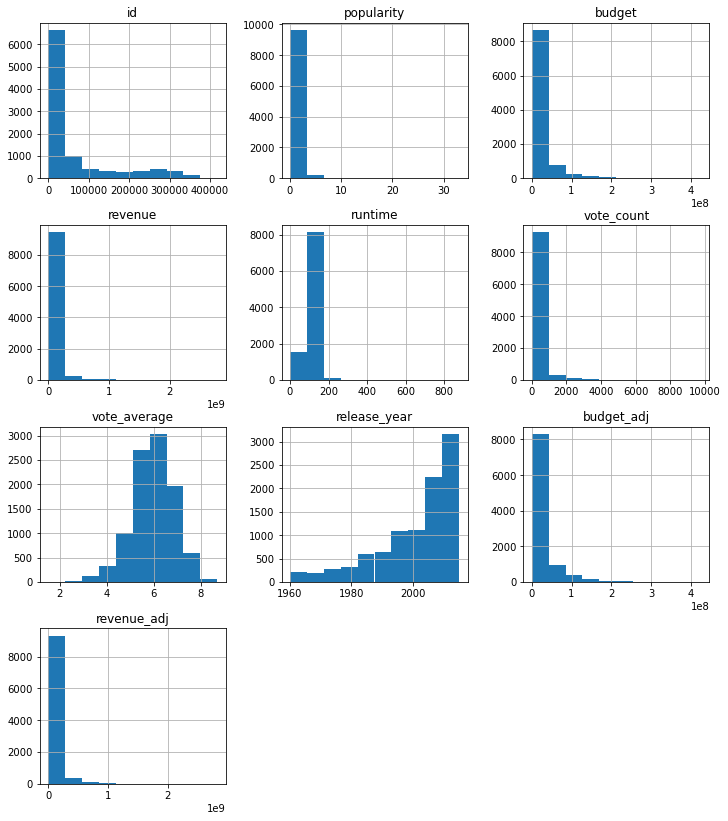

In [27]:
# TO take a look of the histogram and map out relationship betwwen columns
df_cleaned.hist(figsize=(12,14))

## What is the movie title that generated the highest revenue and it's release date in year 1996, 2000, and 2015.

#### From the table and chart below we can see that the movie title that generated the highest  revenue and it's release date in the year 1996, 2000, 2015 are as follows:  
                 **original_Movie_title**            **release_date**
                   Independence Day                  ->  1996-06-25
                   Mission: Impossible II            ->  2000-05-23
                   Star Wars: The Force Awakens      ->  2015-12-15

In [28]:
# selecting rows based on it's release date in the year 1996, 2000, 2015, so i filtered the data to meet the condition
options = [1996, 2000, 2015] 
rslt_df = df_cleaned[df_cleaned['release_year'].isin(options)]
rslt_df.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [29]:
# funtion for plotting chats and displaying
def create_chart(groupby_what, revenue, title, xlabel, ylabel, take_color):
    rslt_df.groupby('{}'.format(groupby_what)).revenue.mean().plot(kind= 'bar', figsize=(9,6), color="{}".format(take_color), width = 0.6);
    plt.title("{}".format(title))
    plt.xlabel("{}".format(xlabel))
    plt.ylabel("{}".format(ylabel))
    return create_chart

<function __main__.create_chart(groupby_what, revenue, title, xlabel, ylabel, take_color)>

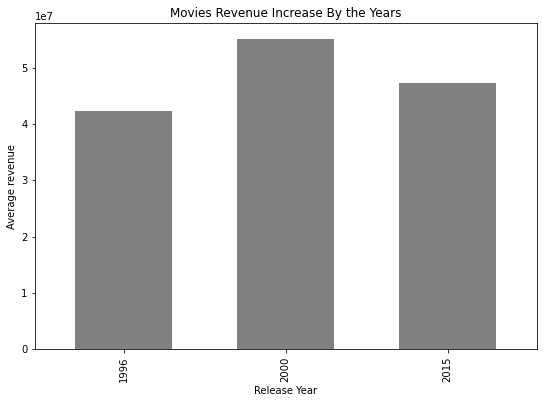

In [30]:
# the plot below shows that movies revenue increase  in the year 2000 exponentially compare to other year
create_chart(groupby_what ='release_year' , 
             revenue = 'revenue', 
             title = 'Movies Revenue Increase By the Years', 
             xlabel ='Release Year', 
             ylabel ='Average revenue', 
             take_color='gray')

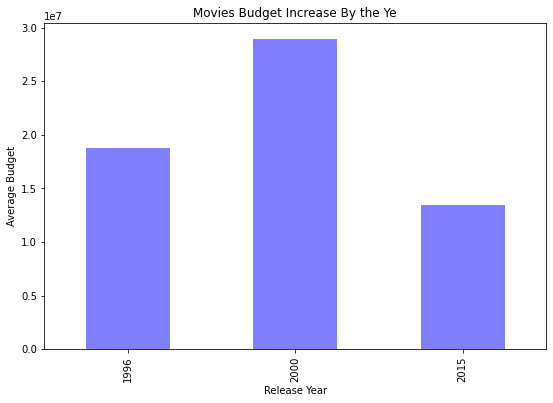

In [31]:
# the plot below shows that movies budget increase  in the year 2000 exponentially compare to other year
rslt_df.groupby('release_year').budget.mean().plot(kind='bar', alpha=0.5, color= 'blue', label='revenue', figsize=(9,6))
plt.title("Movies Budget Increase By the Ye")
plt.xlabel("Release Year"),
plt.ylabel("Average Budget"),
plt.show()

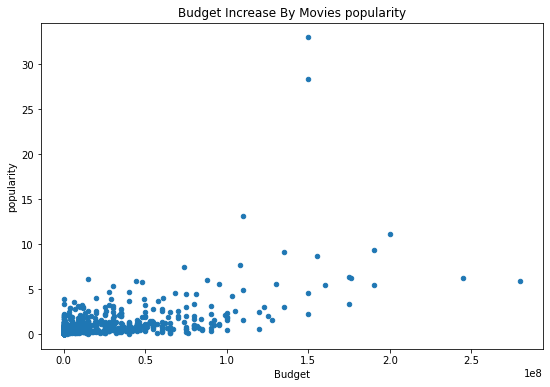

In [32]:
# the scatter plot below shows that movies popularity increase with respect to budget exponentially
rslt_df.plot(kind = 'scatter', x = 'budget', y = 'popularity', figsize=(9,6))
plt.title("Budget Increase By Movies popularity")
plt.xlabel("Budget"),
plt.ylabel("popularity"),
plt.show()

In [33]:
# creating function to query the database to answer the required questions
def query_dataframe(year, rev_num):
    c = df_cleaned.loc[df_cleaned['release_year'] == year].query('revenue  > {}'.format(rev_num))
    return c

In [34]:
## this is the company with the highest revenue 1996
query_dataframe(1996, 494471524)

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
8457,602,4.480733,75000000,816969268,Independence Day,Roland Emmerich,145,Action|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Centrop...,1996-06-25,2000,6.6,1996,1.042663e+08,1.135764e+09


In [35]:
## this is the company with the highest revenue 2000
query_dataframe(2000, 457640427)

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
8666,955,1.956406,125000000,546388105,Mission: Impossible II,John Woo,123,Adventure|Action|Thriller,Paramount Pictures|Cruise/Wagner Productions|M...,2000-05-23,1269,5.8,2000,1.582865e+08,6.918869e+08


In [36]:
## this is the company with the highest revenue 2015 
query_dataframe(2015, 1513528810)

,id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09


## Has movie gain popularity over the years and what is movie runtime trend over the years. 

#### From the Chart below we can see that movie has gain popularity over the years:
- Yes the movie industry has gain popularity over the year, From the Chart below we can see that the movies has gain popularity over the year meaning that people watches more movies nowadays. 


- The movie runtime trend over the years has reduced drastically, From the Chart below we can see that movies runtime has reduced over the years with the downtrend displayed in the chart:

Text(0, 0.5, 'Average popularity')

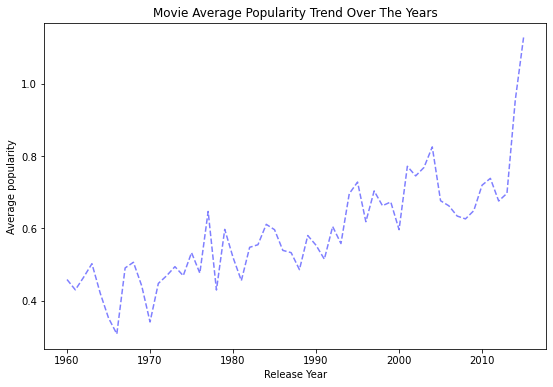

In [37]:
# From the Chart below we can see that the movies has gain popularity over the year meaning that people watches more movies nowadays.
df_cleaned.groupby('release_year').popularity.mean().plot(kind= 'line', alpha=0.5, color= 'blue', label='popularity', figsize=(9,6),  linestyle = 'dashed')
plt.title("Movie Average Popularity Trend Over The Years")
plt.xlabel("Release Year")
plt.ylabel("Average popularity")

Text(0, 0.5, 'Average Runtime')

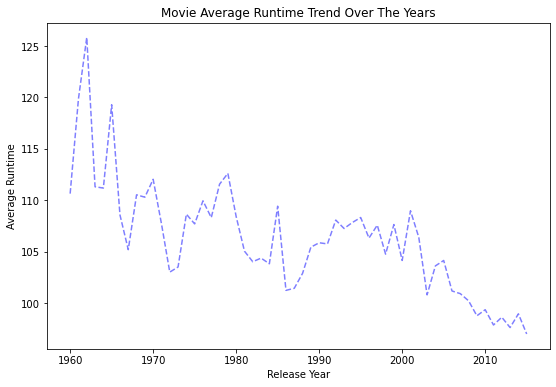

In [38]:
## From the Chart below we can see that movies runtime has reduced over the years with the downtrend displayed in the chart:
df_cleaned.groupby('release_year').runtime.mean().plot(kind= 'line', alpha=0.5, color= 'blue', label='runtime', figsize=(9,6), linestyle = 'dashed');
plt.title("Movie Average Runtime Trend Over The Years")
plt.xlabel("Release Year")
plt.ylabel("Average Runtime")

<a id='conclusions'></a>
## Conclusions

> Finally, the summary of the key findings about the TMDb Movie dataset in relation to the analysis and questions are as follows.

1. The movies runtime or play duration trend over the years has reduced drastically with a strong downtrend.


2. The movies has gain popularity over the year.


3. The above analysis shows that movies vote-count increase exponentially with respect to movie release year


4. The companies with highest vote count in year 1996, 2000, 2015.
     - Twentieth Century Fox Film Corporation |Centrop
     - DreamWorks SKG |Universal Pictures|Scott Free P
     - Village Roadshow Pictures |Kennedy Miller Produ
     
     
5. The companies with lowest vote count in year 1996, 2000, 2015     
     - Universal Pictures
     - Unified Film Organization (UFO) | Python Product
     - La Luna Entertainment


6. The director that has directed the most popular movies year 1996, 2000, 2015 are as follows:
     - Roland Emmerich
     - Ridley Scott
     - Colin Trevorrow

### ***Limitation***
 - Based on my analysis most of the question i addressed was mainly with regard to year 1996, 2000, and 2015, which my result might not be the same with other year.
 
 - Lack of survey response with respect to the data collected.
 
 - using of basic descriptive analysis techinques
 
 - Time and analysis bias with regard to my selected year.

In [39]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295